In [23]:
import FeatureExtract
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

### Test if 5 different models (for each measured Qubit one) can do better than one single one

In [24]:
df = FeatureExtract.extract_all(1000)
input_string = df['observable']
encoded_string = []
for string in input_string:
    encoded_string.append(''.join(['0' if char == 'I' else '1' for char in string]))
df['encoded_observable'] = encoded_string
df_qu0 = df[df['encoded_observable'] == '10000']
df_qu1 = df[df['encoded_observable'] == '01000']
df_qu2 = df[df['encoded_observable'] == '00100']
df_qu3 = df[df['encoded_observable'] == '00010']
df_qu4 = df[df['encoded_observable'] == '00001']


In [25]:
model = LinearRegression()
model0 = model.fit(df_qu0['noisy_expectation'].to_numpy().reshape(-1,1), df_qu0['target'])
model = LinearRegression()
model1 = model.fit(df_qu1['noisy_expectation'].to_numpy().reshape(-1,1), df_qu1['target'])
model = LinearRegression()
model2 = model.fit(df_qu2['noisy_expectation'].to_numpy().reshape(-1,1), df_qu2['target'])
model = LinearRegression()
model3 = model.fit(df_qu3['noisy_expectation'].to_numpy().reshape(-1,1), df_qu3['target'])
model = LinearRegression()
model4 = model.fit(df_qu4['noisy_expectation'].to_numpy().reshape(-1,1), df_qu4['target'])

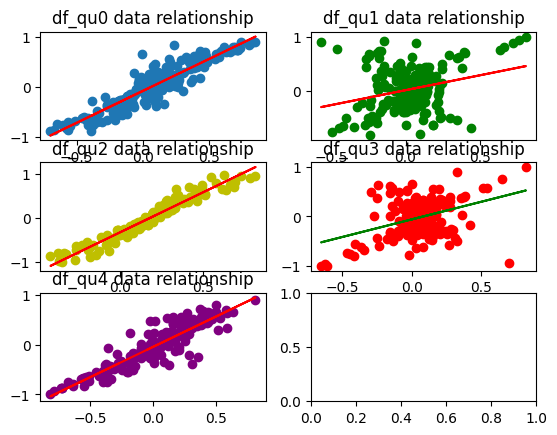

In [26]:
figure, axis = plt.subplots(3, 2)

axis[0,0].scatter(df_qu0['noisy_expectation'], df_qu0['target'])
axis[0,0].plot(df_qu0['noisy_expectation'], model0.predict(df_qu0['noisy_expectation'].to_numpy().reshape(-1, 1)), color='red')
axis[0,0].set_title('df_qu0 data relationship')

axis[0, 1].scatter(df_qu1['noisy_expectation'], df_qu1['target'], color='g')
axis[0, 1].plot(df_qu1['noisy_expectation'], model1.predict(df_qu1['noisy_expectation'].to_numpy().reshape(-1, 1)), color='red')
axis[0, 1].set_title('df_qu1 data relationship')


axis[1, 0].scatter(df_qu2['noisy_expectation'], df_qu2['target'], color='y')
axis[1, 0].plot(df_qu2['noisy_expectation'], model2.predict(df_qu2['noisy_expectation'].to_numpy().reshape(-1, 1)), color='red')
axis[1, 0].set_title('df_qu2 data relationship')

axis[1, 1].scatter(df_qu3['noisy_expectation'], df_qu3['target'], color='r')
axis[1, 1].plot(df_qu3['noisy_expectation'], model3.predict(df_qu3['noisy_expectation'].to_numpy().reshape(-1, 1)), color='g')
axis[1, 1].set_title('df_qu3 data relationship')

axis[2, 0].scatter(df_qu4['noisy_expectation'], df_qu4['target'], color='purple')
axis[2, 0].plot(df_qu4['noisy_expectation'], model4.predict(df_qu4['noisy_expectation'].to_numpy().reshape(-1, 1)), color='red')
axis[2, 0].set_title('df_qu4 data relationship')
plt.show(figure)

### Plot of unmittigated error

<BarContainer object of 6 artists>

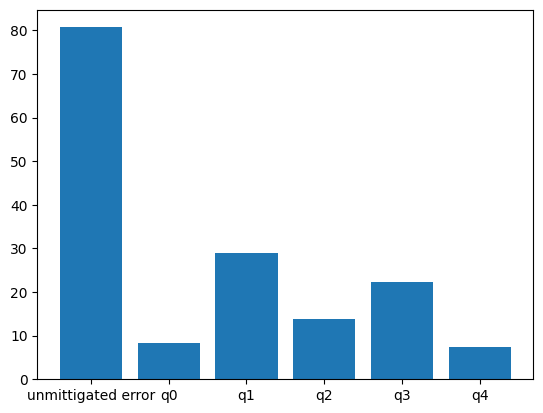

In [27]:
x = ['unmittigated error', 'q0', 'q1', 'q2', 'q3', 'q4']
height = [np.mean(np.sum((df['noisy_expectation']-df['target'])**2)),
          np.mean(np.sum((df_qu0['noisy_expectation']-df_qu0['target'])**2)),
          np.mean(np.sum((df_qu1['noisy_expectation']-df_qu1['target'])**2)),
          np.mean(np.sum((df_qu2['noisy_expectation']-df_qu2['target'])**2)),
          np.mean(np.sum((df_qu3['noisy_expectation']-df_qu3['target'])**2)),
          np.mean(np.sum((df_qu4['noisy_expectation']-df_qu4['target'])**2))]
plt.bar(x, height=height)

# Breakdown of qubits for differing observables

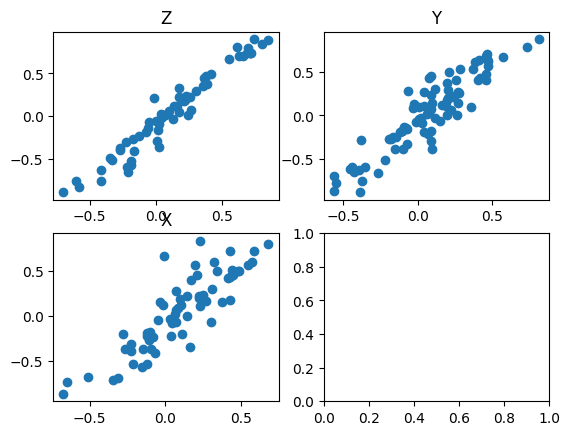

In [28]:
# for q0:
df_qu0_Z = df_qu0[df_qu0['observable'] == 'ZIIII']
df_qu0_X = df_qu0[df_qu0['observable'] == 'XIIII']
df_qu0_Y = df_qu0[df_qu0['observable'] == 'YIIII']

fig, axis = plt.subplots(2,2)
axis[0, 0].scatter(df_qu0_Z['noisy_expectation'], df_qu0_Z['target'])
axis[0, 0].set_title('Z')

axis[1, 0].scatter(df_qu0_X['noisy_expectation'], df_qu0_X['target'])
axis[1, 0].set_title('X')

axis[0, 1].scatter(df_qu0_Y['noisy_expectation'], df_qu0_Y['target'])
axis[0, 1].set_title('Y')
plt.show(fig)

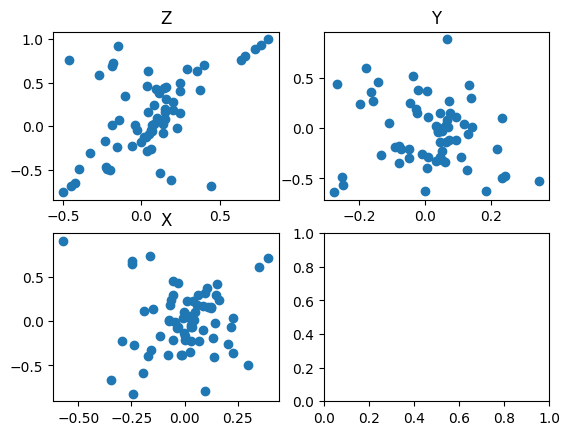

In [29]:
# for q1:
df_qu0_Z = df_qu1[df_qu1['observable'] == 'IZIII']
df_qu0_X = df_qu1[df_qu1['observable'] == 'IXIII']
df_qu0_Y = df_qu1[df_qu1['observable'] == 'IYIII']

fig1, axis1 = plt.subplots(2,2)
axis1[0, 0].scatter(df_qu0_Z['noisy_expectation'], df_qu0_Z['target'])
axis1[0, 0].set_title('Z')

axis1[1, 0].scatter(df_qu0_X['noisy_expectation'], df_qu0_X['target'])
axis1[1, 0].set_title('X')

axis1[0, 1].scatter(df_qu0_Y['noisy_expectation'], df_qu0_Y['target'])
axis1[0, 1].set_title('Y')
plt.show(fig1)

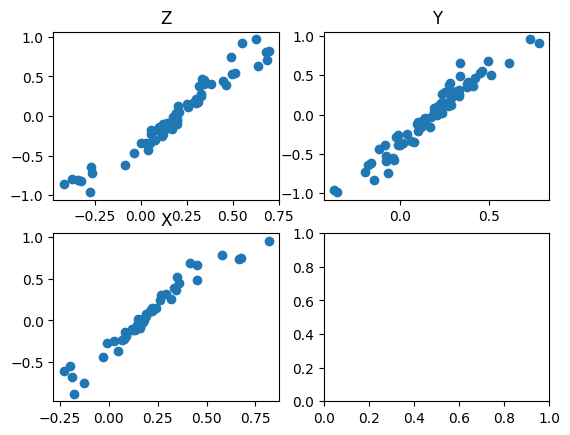

In [30]:
# for q2:
df_qu0_Z = df_qu2[df_qu2['observable'] == 'IIZII']
df_qu0_X = df_qu2[df_qu2['observable'] == 'IIXII']
df_qu0_Y = df_qu2[df_qu2['observable'] == 'IIYII']

fig1, axis1 = plt.subplots(2,2)
axis1[0, 0].scatter(df_qu0_Z['noisy_expectation'], df_qu0_Z['target'])
axis1[0, 0].set_title('Z')

axis1[1, 0].scatter(df_qu0_X['noisy_expectation'], df_qu0_X['target'])
axis1[1, 0].set_title('X')

axis1[0, 1].scatter(df_qu0_Y['noisy_expectation'], df_qu0_Y['target'])
axis1[0, 1].set_title('Y')
plt.show(fig1)

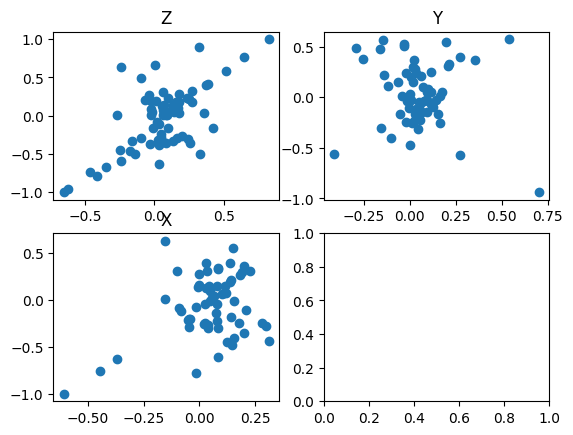

In [31]:
# for q3:
df_qu0_Z = df_qu3[df_qu3['observable'] == 'IIIZI']
df_qu0_X = df_qu3[df_qu3['observable'] == 'IIIXI']
df_qu0_Y = df_qu3[df_qu3['observable'] == 'IIIYI']

fig1, axis1 = plt.subplots(2,2)
axis1[0, 0].scatter(df_qu0_Z['noisy_expectation'], df_qu0_Z['target'])
axis1[0, 0].set_title('Z')

axis1[1, 0].scatter(df_qu0_X['noisy_expectation'], df_qu0_X['target'])
axis1[1, 0].set_title('X')

axis1[0, 1].scatter(df_qu0_Y['noisy_expectation'], df_qu0_Y['target'])
axis1[0, 1].set_title('Y')
plt.show(fig1)

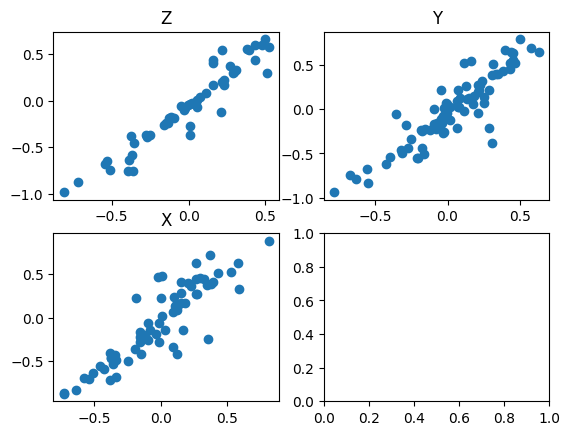

In [32]:
# for q4:
df_qu0_Z = df_qu4[df_qu4['observable'] == 'IIIIZ']
df_qu0_X = df_qu4[df_qu4['observable'] == 'IIIIX']
df_qu0_Y = df_qu4[df_qu4['observable'] == 'IIIIY']

fig1, axis1 = plt.subplots(2,2)
axis1[0, 0].scatter(df_qu0_Z['noisy_expectation'], df_qu0_Z['target'])
axis1[0, 0].set_title('Z')

axis1[1, 0].scatter(df_qu0_X['noisy_expectation'], df_qu0_X['target'])
axis1[1, 0].set_title('X')

axis1[0, 1].scatter(df_qu0_Y['noisy_expectation'], df_qu0_Y['target'])
axis1[0, 1].set_title('Y')
plt.show(fig1)